<div class="alert alert-block alert-info">
<h1> Analyse de données météorologiques à partir des capteurs IOT<h1/>
étapes du projet:<br>
<h3>I.Prétraitement du jeu de données<br><h3/>
¤¤ 1.Exploration des données<br>
¤¤ 2.Feature Engineering<br>
    feature selection
    
¤¤ 3.Visualisation des données<br>
<h3>II. Proposition d’un modèle d’analyse<br><h3/>
   ¤¤ 1.Linear Regression<br>
   ¤¤ 2.Decision Tree<br>
   ¤¤ 3.Random forest<br>
   ¤¤ 4.Gradient Boosting<br>
    
<h3>III.Évaluation du modèle<br><h3/>
¤¤ 1.Mean Absolute Error (MAE)<br>
¤¤ 2.Mean Squared Error (MSE)<br> 
¤¤ 3.Root Mean Squared Error (RMSE)<br>
¤¤ 4.Test des modéles<br>
    
    
<div/>
         


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# choix de jeu de données et importation de dataset

data = pd.read_csv('C:/Users/user/Downloads/iot_data_pfa.csv')

# Exploration des données

In [4]:
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [5]:
data.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [7]:
data.shape

(96453, 12)

In [8]:
data.size

1157436

In [9]:
list(data.columns)

['Formatted Date',
 'Summary',
 'Precip Type',
 'Temperature (C)',
 'Apparent Temperature (C)',
 'Humidity',
 'Wind Speed (km/h)',
 'Wind Bearing (degrees)',
 'Visibility (km)',
 'Loud Cover',
 'Pressure (millibars)',
 'Daily Summary']

In [10]:
data.describe(include='all')

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
count,96453,96453,95936,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000,96453
unique,96429,27,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,214
top,2010-08-02 00:00:00.000 +0200,Partly Cloudy,rain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mostly cloudy throughout the day.
freq,2,31733,85224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20085
mean,NaN,NaN,NaN,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956,NaN
std,NaN,NaN,NaN,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906,NaN
min,NaN,NaN,NaN,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,NaN
25%,NaN,NaN,NaN,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000,NaN
50%,NaN,NaN,NaN,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000,NaN
75%,NaN,NaN,NaN,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000,NaN


In [11]:
data.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

# Feature engineering

In [12]:
from datetime import datetime

In [13]:
# rectification d'encodage de la date
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'], utc= True)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   Formatted Date            96453 non-null  datetime64[ns, UTC]
 1   Summary                   96453 non-null  object             
 2   Precip Type               95936 non-null  object             
 3   Temperature (C)           96453 non-null  float64            
 4   Apparent Temperature (C)  96453 non-null  float64            
 5   Humidity                  96453 non-null  float64            
 6   Wind Speed (km/h)         96453 non-null  float64            
 7   Wind Bearing (degrees)    96453 non-null  float64            
 8   Visibility (km)           96453 non-null  float64            
 9   Loud Cover                96453 non-null  float64            
 10  Pressure (millibars)      96453 non-null  float64            
 11  Daily Summary  

In [15]:
# elimination des cologne inutile
cols = ['Summary','Precip Type','Daily Summary','Wind Bearing (degrees)','Visibility (km)','Loud Cover']
data = data.drop(cols,axis=1)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   Formatted Date            96453 non-null  datetime64[ns, UTC]
 1   Temperature (C)           96453 non-null  float64            
 2   Apparent Temperature (C)  96453 non-null  float64            
 3   Humidity                  96453 non-null  float64            
 4   Wind Speed (km/h)         96453 non-null  float64            
 5   Pressure (millibars)      96453 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(5)
memory usage: 4.4 MB


In [17]:
idata = data.sort_values(by=['Formatted Date'])

In [18]:
# indexation du dataframe par date
idata = idata.set_index('Formatted Date')

In [19]:
idata.index

DatetimeIndex(['2005-12-31 23:00:00+00:00', '2006-01-01 00:00:00+00:00',
               '2006-01-01 01:00:00+00:00', '2006-01-01 02:00:00+00:00',
               '2006-01-01 03:00:00+00:00', '2006-01-01 04:00:00+00:00',
               '2006-01-01 05:00:00+00:00', '2006-01-01 06:00:00+00:00',
               '2006-01-01 07:00:00+00:00', '2006-01-01 08:00:00+00:00',
               ...
               '2016-12-31 13:00:00+00:00', '2016-12-31 14:00:00+00:00',
               '2016-12-31 15:00:00+00:00', '2016-12-31 16:00:00+00:00',
               '2016-12-31 17:00:00+00:00', '2016-12-31 18:00:00+00:00',
               '2016-12-31 19:00:00+00:00', '2016-12-31 20:00:00+00:00',
               '2016-12-31 21:00:00+00:00', '2016-12-31 22:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Formatted Date', length=96453, freq=None)

In [20]:
# elimination des valeurs dupliquer sur l'index date
idata.index.drop_duplicates(keep='first')

DatetimeIndex(['2005-12-31 23:00:00+00:00', '2006-01-01 00:00:00+00:00',
               '2006-01-01 01:00:00+00:00', '2006-01-01 02:00:00+00:00',
               '2006-01-01 03:00:00+00:00', '2006-01-01 04:00:00+00:00',
               '2006-01-01 05:00:00+00:00', '2006-01-01 06:00:00+00:00',
               '2006-01-01 07:00:00+00:00', '2006-01-01 08:00:00+00:00',
               ...
               '2016-12-31 13:00:00+00:00', '2016-12-31 14:00:00+00:00',
               '2016-12-31 15:00:00+00:00', '2016-12-31 16:00:00+00:00',
               '2016-12-31 17:00:00+00:00', '2016-12-31 18:00:00+00:00',
               '2016-12-31 19:00:00+00:00', '2016-12-31 20:00:00+00:00',
               '2016-12-31 21:00:00+00:00', '2016-12-31 22:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Formatted Date', length=96429, freq=None)

In [21]:
# supression des ligne contenant les valeur null 
idata.dropna()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars)
Formatted Date,,,,,
2005-12-31 23:00:00+00:00,0.577778,-4.050000,0.89,17.1143,1016.66
2006-01-01 00:00:00+00:00,1.161111,-3.238889,0.85,16.6152,1016.15
2006-01-01 01:00:00+00:00,1.666667,-3.155556,0.82,20.2538,1015.87
2006-01-01 02:00:00+00:00,1.711111,-2.194444,0.82,14.4900,1015.56
2006-01-01 03:00:00+00:00,1.183333,-2.744444,0.86,13.9426,1014.98
...,...,...,...,...,...
2016-12-31 18:00:00+00:00,0.488889,-2.644444,0.86,9.7566,1020.03
2016-12-31 19:00:00+00:00,0.072222,-3.050000,0.88,9.4185,1020.27
2016-12-31 20:00:00+00:00,-0.233333,-3.377778,0.89,9.2736,1020.50


In [22]:
idata.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars)
Formatted Date,,,,,
2005-12-31 23:00:00+00:00,0.577778,-4.050000,0.89,17.1143,1016.66
2006-01-01 00:00:00+00:00,1.161111,-3.238889,0.85,16.6152,1016.15
2006-01-01 01:00:00+00:00,1.666667,-3.155556,0.82,20.2538,1015.87
2006-01-01 02:00:00+00:00,1.711111,-2.194444,0.82,14.4900,1015.56
2006-01-01 03:00:00+00:00,1.183333,-2.744444,0.86,13.9426,1014.98


In [23]:
idata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96453 entries, 2005-12-31 23:00:00+00:00 to 2016-12-31 22:00:00+00:00
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Temperature (C)           96453 non-null  float64
 1   Apparent Temperature (C)  96453 non-null  float64
 2   Humidity                  96453 non-null  float64
 3   Wind Speed (km/h)         96453 non-null  float64
 4   Pressure (millibars)      96453 non-null  float64
dtypes: float64(5)
memory usage: 6.4 MB


# Visualisation des Données

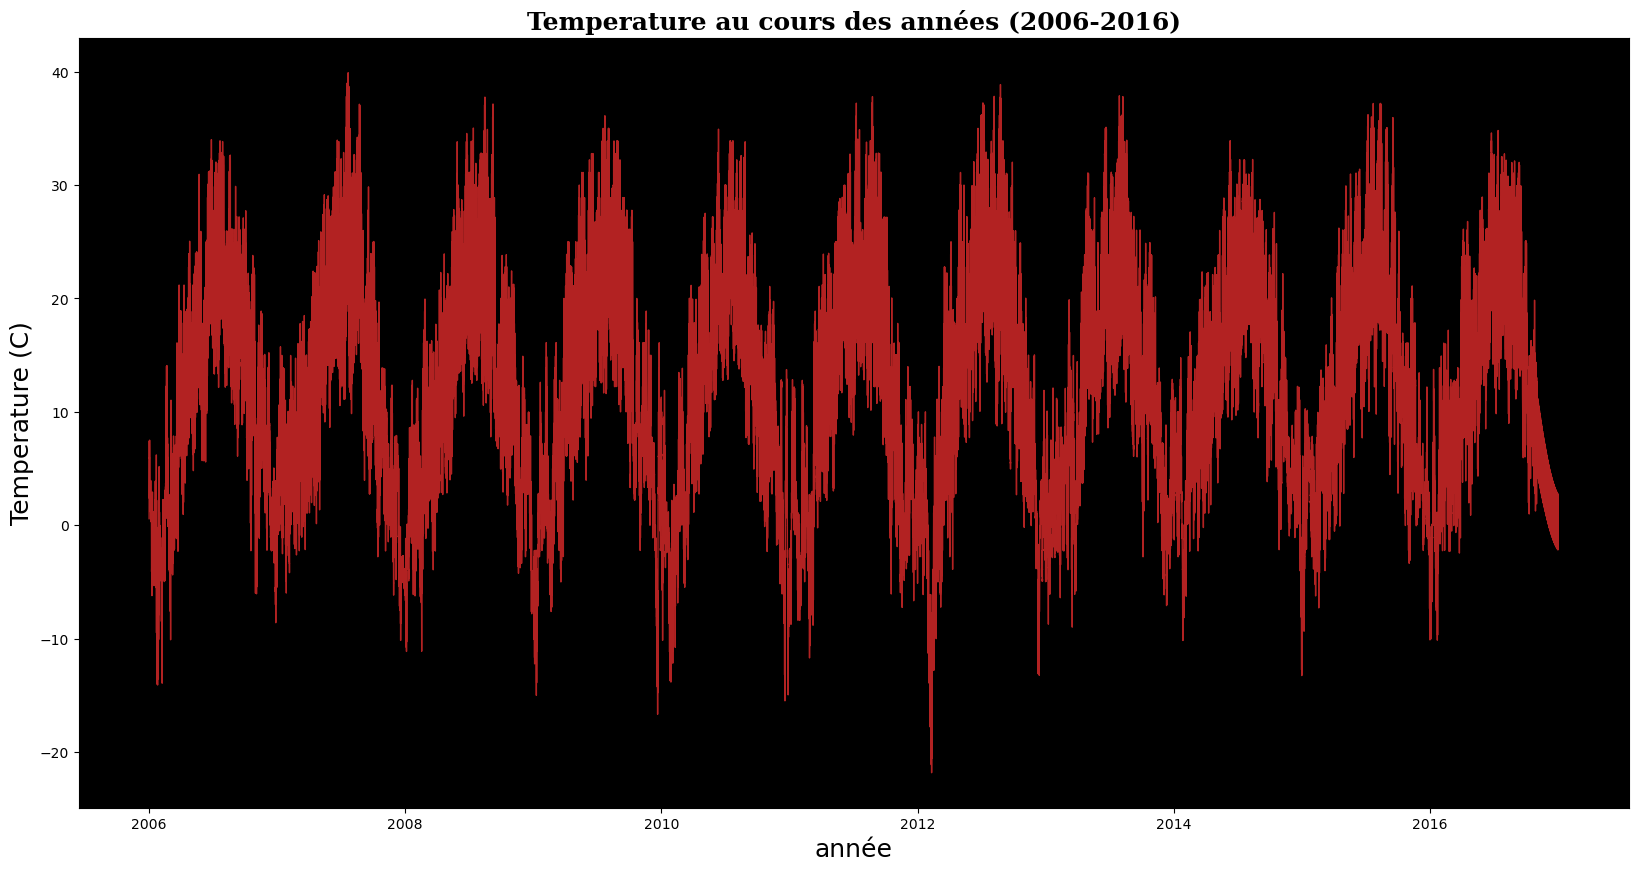

In [24]:
# Visualisation de la variable {Temperature (C)}
plt.rcParams['axes.facecolor']='black'
plt.figure(figsize=(20,10))
plt.plot(idata.index,idata["Temperature (C)"],lw=1,color="firebrick")
plt.title("Temperature au cours des années (2006-2016)",fontsize=18,fontweight="bold",fontfamily="serif")
plt.xlabel("année",fontsize=18)
plt.ylabel("Temperature (C)",fontsize=18)
plt.show()

In [25]:
'''Méthode pratique pour la conversion de fréquence et le rééchantillonnage de séries chronologiques. 
L’objet doit avoir un index de type datetime'''
# rééchantillonnage par semaine W=weekly et en moyenne pour enlever l'encombrement vu dans la figure precedente
idata2 = idata.resample(rule='W').mean()
idata2.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars)
Formatted Date,,,,,
2006-01-01 00:00:00+00:00,3.935111,-0.329556,0.820000,21.064596,1012.172000
2006-01-08 00:00:00+00:00,2.107903,-0.040972,0.907500,9.201725,1005.507202
2006-01-15 00:00:00+00:00,-1.226819,-2.651521,0.866429,5.628675,1022.832976
2006-01-22 00:00:00+00:00,-1.579563,-4.892890,0.847024,11.652758,1022.191429
2006-01-29 00:00:00+00:00,-7.093221,-10.057606,0.720119,7.811279,1034.094167


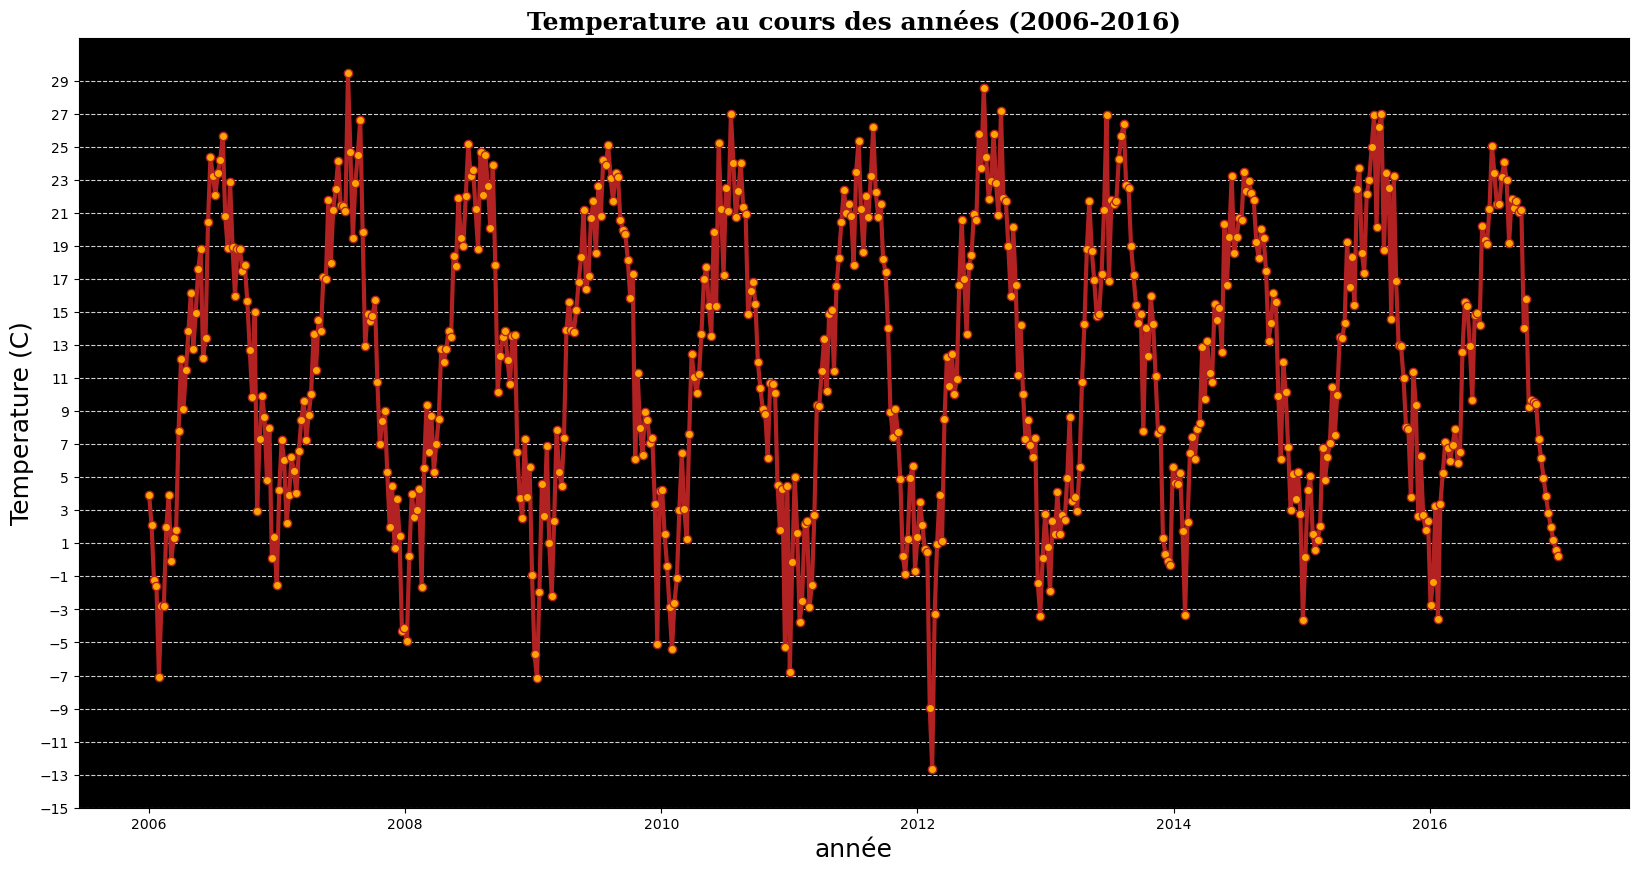

In [26]:
plt.figure(figsize=(20,10))
idata2.index,idata2["Temperature (C)"]
plt.plot(idata2.index,idata2["Temperature (C)"],lw=3,color="firebrick",marker="o",markerfacecolor="orange")

plt.title("Temperature au cours des années (2006-2016)",fontsize=18,fontweight="bold",fontfamily="serif")
plt.xlabel("année",fontsize=18)
plt.ylabel("Temperature (C)",fontsize=18)
plt.grid(True,color='lightgrey',axis="y",ls="--")
plt.yticks([temp for temp in range(-15,30,2)])


plt.show()

In [27]:
# donnée sur l'année 2016
jan2006 = idata['2006-01-01':'2006-01-31']
jan2006

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars)
Formatted Date,,,,,
2006-01-01 00:00:00+00:00,1.161111,-3.238889,0.85,16.6152,1016.15
2006-01-01 01:00:00+00:00,1.666667,-3.155556,0.82,20.2538,1015.87
2006-01-01 02:00:00+00:00,1.711111,-2.194444,0.82,14.4900,1015.56
2006-01-01 03:00:00+00:00,1.183333,-2.744444,0.86,13.9426,1014.98
2006-01-01 04:00:00+00:00,1.205556,-3.072222,0.85,15.9068,1014.08
...,...,...,...,...,...
2006-01-31 19:00:00+00:00,-2.400000,-2.400000,0.88,4.6046,1024.54
2006-01-31 20:00:00+00:00,-1.933333,-1.933333,0.85,3.2200,1024.29
2006-01-31 21:00:00+00:00,-1.922222,-3.988889,0.86,5.4901,1024.66


Text(0, 0.5, 'Temperature (C)')

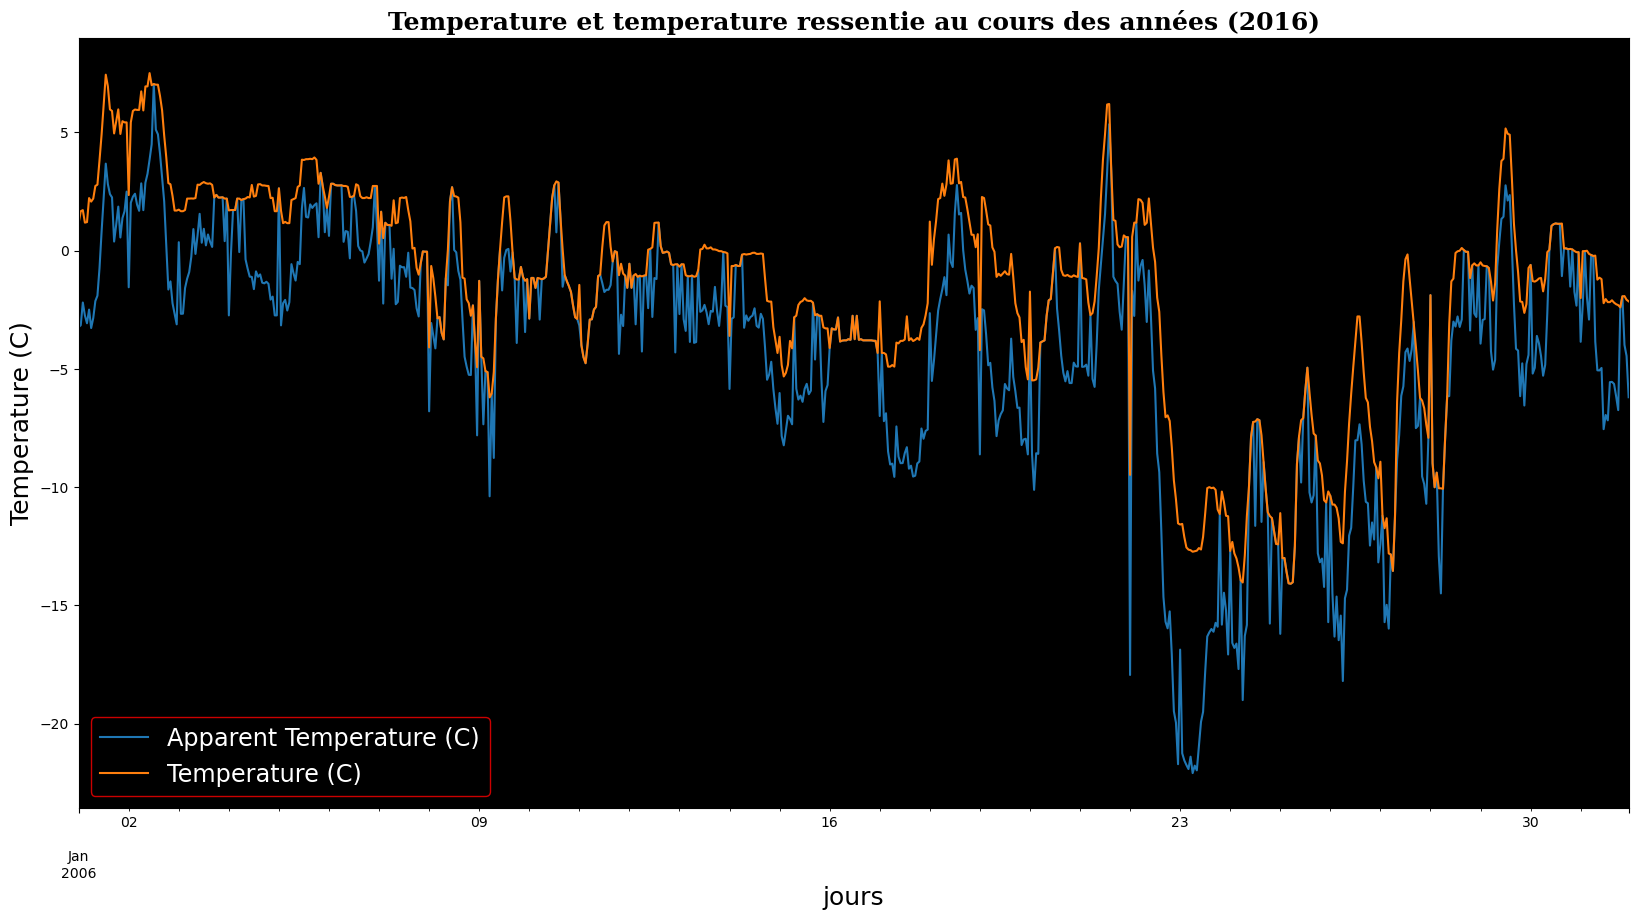

In [28]:
jan2006.plot(y=['Apparent Temperature (C)','Temperature (C)'],kind='line',figsize=(20,10))
plt.legend(labelcolor='white', facecolor='black',edgecolor='red', fontsize='xx-large')
plt.title("Temperature et temperature ressentie au cours des années (2016)",fontsize=18,fontweight="bold",fontfamily="serif")
plt.xlabel("jours",fontsize=18)
plt.ylabel("Temperature (C)",fontsize=18)



In [29]:
# rééchantillonnage par jour D=day et en moyenne pour enlever l'encombrement vu dans la figure precedente
JAN = jan2016.resample(rule='D').mean()
JAN.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars)
Formatted Date,,,,,
2006-01-01 00:00:00+00:00,4.075000,-0.174537,0.817083,21.229192,1011.985000
2006-01-02 00:00:00+00:00,5.263194,1.808796,0.847083,17.824713,1010.384167
2006-01-03 00:00:00+00:00,2.340509,0.445370,0.897083,7.726658,1021.170833
2006-01-04 00:00:00+00:00,2.251852,-0.663194,0.906667,12.152817,981.770833
2006-01-05 00:00:00+00:00,2.703935,0.445833,0.951250,8.991179,935.873750


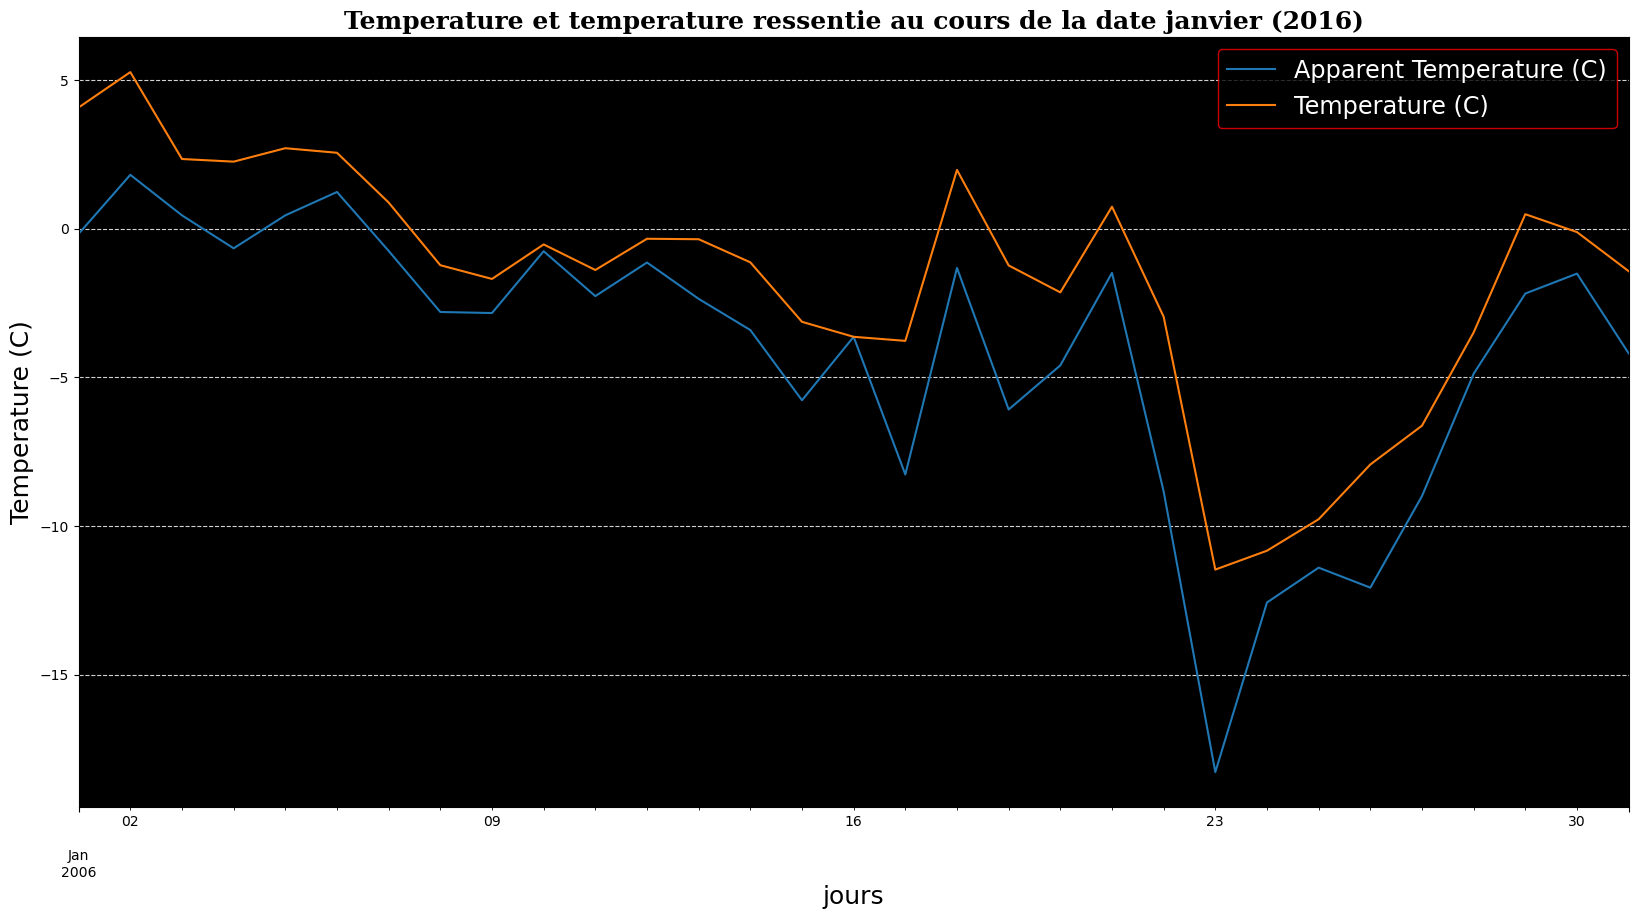

In [30]:
JAN.plot(y=['Apparent Temperature (C)','Temperature (C)'],kind='line',figsize=(20,10))
plt.legend(labelcolor='white', facecolor='black',edgecolor='red', fontsize='xx-large')
plt.title("Temperature et temperature ressentie au cours de la date janvier (2016)",fontsize=18,fontweight="bold",fontfamily="serif")
plt.xlabel("jours",fontsize=18)
plt.ylabel("Temperature (C)",fontsize=18)
plt.grid(True,color='lightgrey',axis="y",ls="--")


In [31]:
#correlation entre les variables
# une mesure de l’association linéaire, ou la force d’un lien entre deux variable ou plus
idata.corr()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars)
Temperature (C),1.000000,0.992629,-0.632255,0.008957,-0.005447
Apparent Temperature (C),0.992629,1.000000,-0.602571,-0.056650,-0.000219
Humidity,-0.632255,-0.602571,1.000000,-0.224951,0.005454
Wind Speed (km/h),0.008957,-0.056650,-0.224951,1.000000,-0.049263
Pressure (millibars),-0.005447,-0.000219,0.005454,-0.049263,1.000000


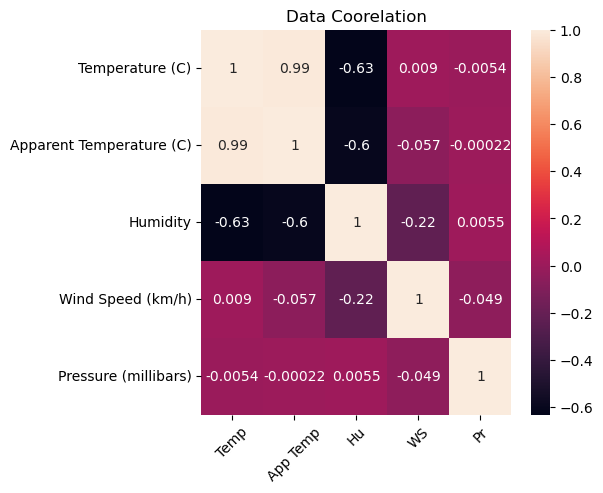

In [32]:
#visualisation de la correlation entre les variables
plt.figure(figsize  =(5,5))
plt.title('Data Coorelation') 
titles=["Temp","App Temp","Hu","WS","Pr"]
plt.xticks(rotation = 45)

sns.heatmap(idata.corr(),annot=True,xticklabels=titles)
plt.show()

on remarque qu'il ya une forte correlation entre les variables suivantes:
- Temperature
- Temperature ressentie
- humidité


In [33]:
xdata=idata.drop(["Wind Speed (km/h)","Pressure (millibars)"],axis=1)
xdata

,Temperature (C),Apparent Temperature (C),Humidity
Formatted Date,,,
2005-12-31 23:00:00+00:00,0.577778,-4.050000,0.89
2006-01-01 00:00:00+00:00,1.161111,-3.238889,0.85
2006-01-01 01:00:00+00:00,1.666667,-3.155556,0.82
2006-01-01 02:00:00+00:00,1.711111,-2.194444,0.82
2006-01-01 03:00:00+00:00,1.183333,-2.744444,0.86
...,...,...,...
2016-12-31 18:00:00+00:00,0.488889,-2.644444,0.86
2016-12-31 19:00:00+00:00,0.072222,-3.050000,0.88
2016-12-31 20:00:00+00:00,-0.233333,-3.377778,0.89


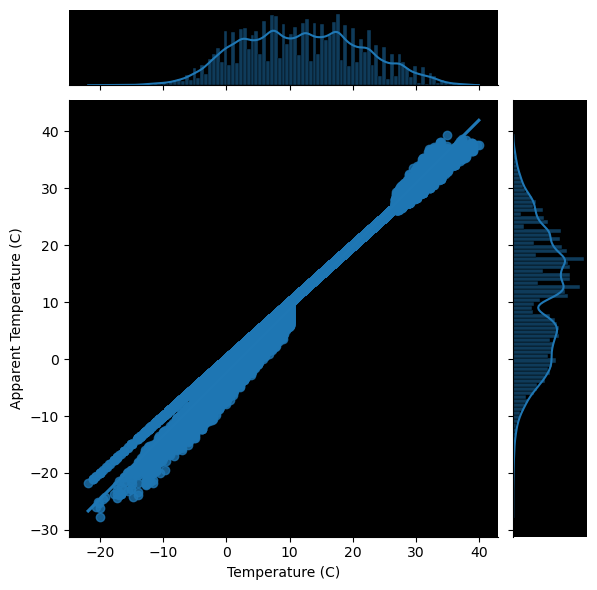

In [34]:
sns.jointplot(x='Temperature (C)', y='Apparent Temperature (C)',kind="reg",data=data)

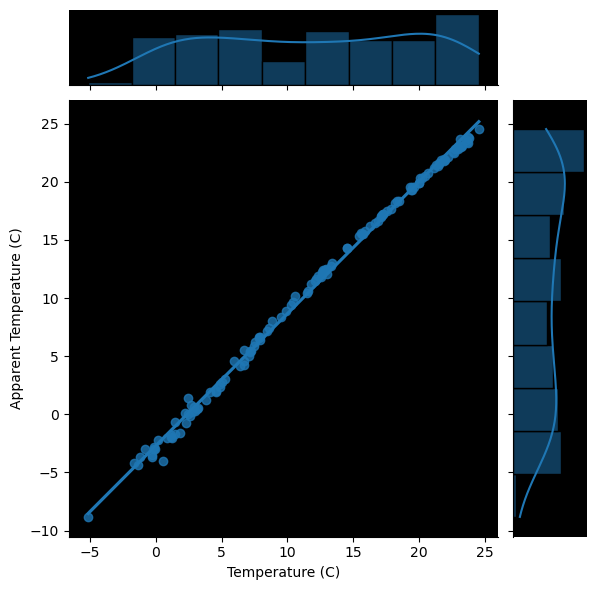

In [56]:
sns.jointplot(x=idata['Temperature (C)'].resample(rule='M').mean(), y=idata['Apparent Temperature (C)'].resample(rule='M').mean(),kind="reg",data=data)

In [ ]:
pd.set_option('display.max_row',100)
pd.set_option('display.max_column',100)

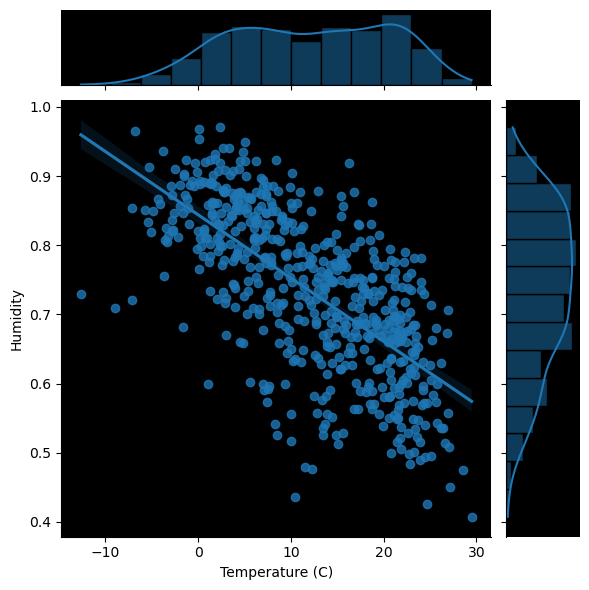

In [51]:
 
sns.jointplot(kind='reg',y=idata['Humidity'].resample(rule='W').mean(),x=idata['Temperature (C)'].resample(rule='W').mean())
plt.show()

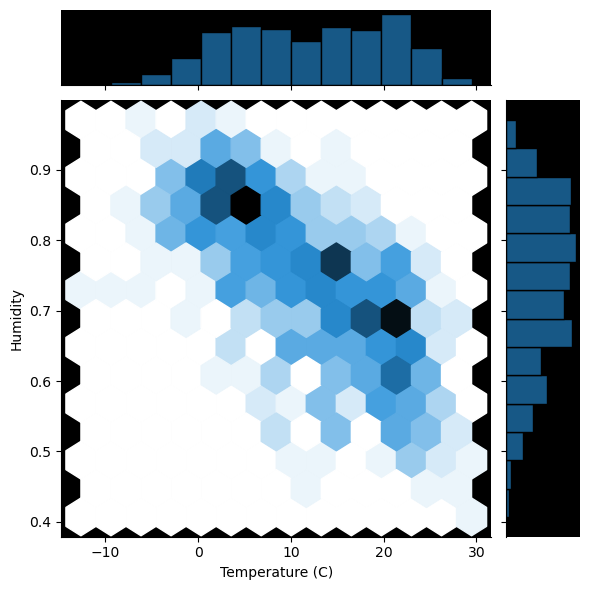

In [55]:
sns.jointplot(kind='hex',y=idata['Humidity'].resample(rule='W').mean(),x=idata['Temperature (C)'].resample(rule='W').mean())

<li>Inversement proportionnel</li>
<li>La relation entre la formule <b>d’humidité</b> et de <b>température</b> indique simplement qu’ils sont inversement proportionnels. Si la température augmente, cela entraînera une diminution de l’humidité relative, donc l’air deviendra plus sec alors que lorsque la température diminue, l’air deviendra humide, ce qui signifie que l’humidité relative augmentera.</li>

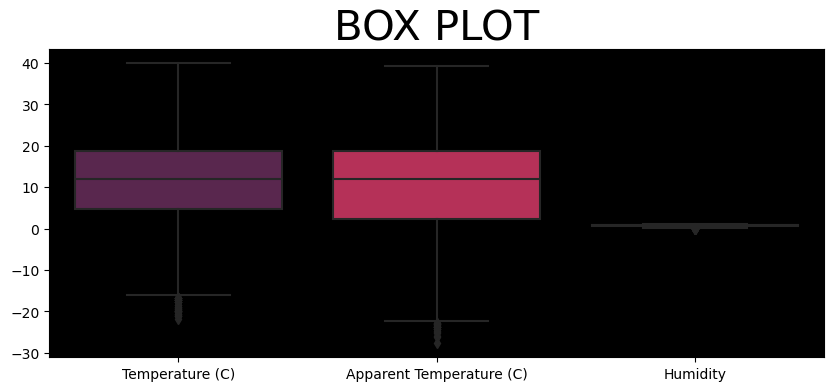

In [57]:
plt.figure(figsize = (10,4))
plt.title('BOX PLOT', fontsize=30)
sns.boxplot(data = idata.drop(["Wind Speed (km/h)","Pressure (millibars)"],axis=1),palette="rocket")
plt.show()


# Entrainement des modéles

In [ ]:
from sklearn import metrics


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
X = idata['2006-01-01':'2006-07-20']
X

In [ ]:
X1 = idata['2006-07-21':'2006-12-31']
X1

In [ ]:
X_train = X[['Temperature (C)','Humidity','Wind Speed (km/h)','Pressure (millibars)']]
X_train.info()

In [ ]:
Y_train = X['Apparent Temperature (C)']
Y_train

In [ ]:
regr = linear_model.LinearRegression()

In [ ]:
regr.fit(X_train,Y_train)

In [ ]:
X_test = X1[['Temperature (C)','Humidity','Wind Speed (km/h)','Pressure (millibars)']]
X_test

In [ ]:

Y_test = X1['Apparent Temperature (C)']
Y_test

In [ ]:
y_pred = regr.predict(X_test)

In [ ]:
regr.score(X_test,Y_test)

In [ ]:
prediction = regr.predict(X_test)
prediction

In [ ]:
prediction=  prediction.astype(int)

In [ ]:
from sklearn import metrics

In [ ]:
print('MAE :'," ", metrics.mean_absolute_error(Y_test,prediction))
print('MSE :'," ", metrics.mean_squared_error(Y_test,prediction))
print('RMSE :'," ", np.sqrt(metrics.mean_squared_error(Y_test,prediction)))

In [ ]:
sns.distplot(Y_test - prediction,bins=50)

In [ ]:
random = RandomForestRegressor(n_estimators = 100, random_state = 0) 
random.fit(X_train , Y_train)  
random.score(X_test, Y_test)

In [ ]:
predictions = random.predict(X_test)

In [ ]:
sns.regplot(Y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [ ]:
from sklearn import metrics
print('MAE :'," ", metrics.mean_absolute_error(Y_test,predictions))
print('MSE :'," ", metrics.mean_squared_error(Y_test,predictions))
print('RMSE :'," ", np.sqrt(metrics.mean_squared_error(Y_test,predictions)))

In [ ]:
sns.distplot(Y_test - predictions,bins=50)

In [ ]:
from sklearn import ensemble

In [ ]:
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5)
clf.fit(X_train, Y_train)

In [ ]:
clf.score(X_test, Y_test)

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [ ]:
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),X_test,Y_test,cv=cv)

In [ ]:
regr.coef_

In [ ]:
prediction = regr.predict(X_test)
prediction

In [ ]:
sns.distplot(Y_test - prediction,bins=50)

In [ ]:
sns.regplot(Y_test,prediction)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [ ]:
y_pred = regr.predict(X_test)

In [ ]:
regr.score(X_test,Y_test)

In [ ]:
data = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
data